In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [134]:
df_raw = pd.read_csv('data/carInsurance_train.csv')

In [111]:
df_raw.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [79]:
df = df_raw.select_dtypes('number')

In [14]:
df.dropna(inplace=True)

In [19]:
df.columns

Index(['Id', 'Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan',
       'LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'CarInsurance'],
      dtype='object')

In [42]:
X = df[['Age','Balance','HHInsurance','CarLoan']]
y = df['CarInsurance']

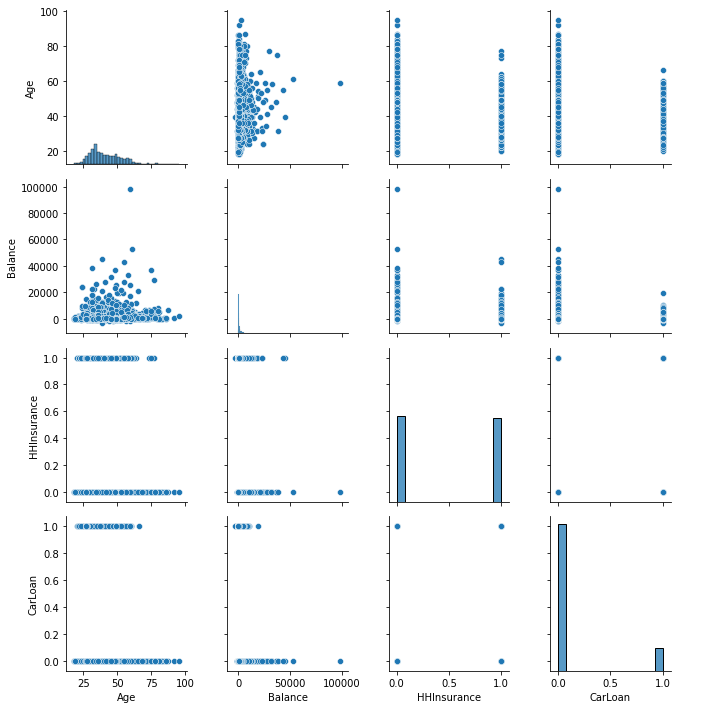

In [43]:
sns.pairplot(X)

# MVP

In [44]:
from sklearn.linear_model import LogisticRegression

In [65]:
clf = LogisticRegression()

In [67]:
clf.fit(X, y)

LogisticRegression()

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
cross_val_score(clf, X, y, scoring='f1').mean()

0.397960915997479

# Iteracion sobre modelo
### objetivo mejorar score

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
clf_t = DecisionTreeClassifier()

In [72]:
clf_t = GridSearchCV(DecisionTreeClassifier(),
                     param_grid = {'min_samples_leaf':np.arange(5,25),
                                   'max_depth':[2,3,4,5,6,8,9,10]},
                     scoring='f1')

In [73]:
clf_t.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 8, 9, 10],
                         'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24])},
             scoring='f1')

In [74]:
clf_t.best_score_

0.49661702151965115

In [75]:
clf_t.best_params_

{'max_depth': 6, 'min_samples_leaf': 12}

# Iteracion sobre Features
## objetivo mejorar score

In [160]:
from sklearn.preprocessing import OneHotEncoder

In [161]:
encoder = OneHotEncoder(handle_unknown='ignore')

#df = df_raw[['Age','Balance','HHInsurance','CarLoan','Education','Job','Marital','CarInsurance']]
df = df_raw
df.dropna(inplace=True)

ohe = df[['Education','Job','Marital']]

encoder.fit(ohe.values.reshape(-1,1))
encoder.categories_

[array(['admin.', 'blue-collar', 'divorced', 'entrepreneur', 'housemaid',
        'management', 'married', 'primary', 'retired', 'secondary',
        'self-employed', 'services', 'single', 'student', 'technician',
        'tertiary', 'unemployed'], dtype=object)]

In [115]:
encoded = encoder.transform(ohe.values.reshape(-1,1))
encoded.todense()

matrix([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [116]:
df = pd.concat([df,pd.DataFrame(encoded.todense())], axis=1)

In [125]:
df = df.select_dtypes('number')
df.head()

,Age,Balance,HHInsurance,CarLoan,CarInsurance,0,1,2,3,4,...,7,8,9,10,11,12,13,14,15,16
0,32.0,1218.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,32.0,1156.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29.0,637.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,25.0,373.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,2694.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
X = df[['Age','Balance','HHInsurance','CarLoan',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
y = df['CarInsurance']

In [127]:
clf_t = DecisionTreeClassifier()

In [128]:
clf_t = GridSearchCV(DecisionTreeClassifier(),
                     param_grid = {'min_samples_leaf':np.arange(5,25),
                                   'max_depth':[2,3,4,5,6,8,9,10]},
                     scoring='f1')

In [129]:
clf_t.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 8, 9, 10],
                         'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24])},
             scoring='f1')

In [130]:
clf_t.best_score_

0.5243306289998539

In [131]:
clf_t.best_params_

{'max_depth': 3, 'min_samples_leaf': 15}

# Calificacion

In [132]:
from sklearn.model_selection import train_test_split

In [140]:
features = df_raw.select_dtypes('number').drop('CarInsurance', axis=1)
target = df_raw['CarInsurance']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=8) 

In [142]:
clf_t = GridSearchCV(DecisionTreeClassifier(),
                     param_grid = {'min_samples_leaf':np.arange(5,25),
                                   'max_depth':[2,3,4,5,6,8,9,10]},
                     scoring='f1')

In [143]:
clf_t.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 8, 9, 10],
                         'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24])},
             scoring='f1')

In [144]:
clf_t.best_score_

0.5546117807881412

In [148]:
import sklearn.metrics as metrics

In [151]:
metrics.f1_score(y_test, clf_t.predict(X_test))

0.5272206303724929

In [156]:
preds = clf_t.best_estimator_.fit(X_train, y_train).predict(X_test)

In [157]:
metrics.f1_score(y_test, preds)

0.5272206303724929